<a href="https://colab.research.google.com/github/ManelSoengas/DL_Task1/blob/main/DL_RoBERTa__0_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modelo RoBERTA. No se ha aplicado ningún preprocesamiento a los datos.
Roberta_0 indica que no hay preprocesamiento.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
!pip install transformers
from transformers import BertTokenizer, TFBertForSequenceClassification

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.4 MB/s eta 0:00:00


In [3]:
from sklearn.utils import shuffle
test_data = pd.read_csv('/content/EXIST2021_test_labeled.tsv', sep='\t')
train_data = pd.read_csv('/content/EXIST2021_training.tsv', sep='\t') #swapping data_set training
# Mezclar los datos de entrenamiento
shuffled_train_data = shuffle(train_data, random_state=42)

# Mezclar los datos de prueba
shuffled_test_data = shuffle(test_data, random_state=42)


In [ ]:

# Cargar el tokenizador de BERT
#tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', vocab_size=30522)
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')


# Cargar el modelo BERT pre-entrenado
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=2)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import numpy as np

test_data['text'] = test_data['text'].fillna('')  # Rellenar los valores perdidos con una cadena vacía

token_lens = []

for txt in test_data['text'].values:
    tokens = tokenizer.encode(txt, max_length=500, truncation=True)
    token_lens.append(len(tokens))

max_len=np.max(token_lens)

In [ ]:
import numpy as np

train_data['text'] = train_data['text'].fillna('')  # Rellenar los valores perdidos con una cadena vacía

token_lenss = []

for txt in train_data['text'].values:
    tokens = tokenizer.encode(txt, max_length=50, truncation=True)
    token_lenss.append(len(tokens))

max_len=np.max(token_lenss)

In [4]:
X = shuffled_train_data['text'].values
y = shuffled_train_data['task1'].values
Z = shuffled_test_data['text'].values
z= shuffled_test_data['task1'].values

In [5]:
print(X)

['@BulnesUno @sotoadaltres No es que no de ni una..., es que es otra analfabeta florero de Sánchez...Maldad, como todas las mujeres que hay en el gobierno..., y digo maldad, no porque tenga nada en contra de la mujer, faltaría más, si no porque mienten a propósito y haciendo daño..., como la Celaaaaaaaá.'
 '@Guiyoto @josevico4 @unchinodechina Si, los tiene locos a ellos y a todos,porque ahí me parece a mí que no hay nadie al volante. Lo siento pero esa mujer no está haciendo las cosas bien,y no escucha a nadie.'
 '@fatimafarha_ I was getting picked up from some place years ago and I tried to get into a strangers car thinking it was my friends  even knocked on the window like ‘why aren’t you unlocking the doors’ before seeing through the tinted windows that it was some random lady'
 ...
 'Gol tuneado. Bajito. Musica al palo. Macho pito chico al volante. Mujer de acompañante. Niño pequeño haciendo de airbag. Tipica escena del conurbano.'
 '@abc_es Mujer al volante'
 "well yeah ofcourse y

In [6]:
# Dividir los datos en entrenamiento y prueba
train_text, val_text, train_task1, val_task1 = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
print(train_text)

['youre pregnant'
 'divine ingabire first human right tulip rwanda initiative matter provide free sanitary school girl mean period poverty humanrightsday humanrights womensrights'
 'hablar gata perra entiendente aseguro entender' ...
 'people live life cock block buzz kill others dont'
 'azconar seor contraar matrimonio seorita tener hermano consecuencia seor tener cuado encontrar calle haber detener saludar interesar problema animarlo amargura gasto tiempo derivar ninguno ventaja'
 'tarde chica responsable limpiar habitacin sentir limpia']


In [7]:
MAX_LEN=255

In [8]:
#keras
import tensorflow as tf
from tensorflow import keras


#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
import numpy as np
from sklearn import preprocessing
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(train_task1).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(val_task1).reshape(-1, 1)).toarray()
z_test = ohe.fit_transform(np.array(z).reshape(-1, 1)).toarray()

In [11]:
def tokenize_roberta(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer_roberta.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            truncation_strategy='longest_first',
            return_attention_mask=True

        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [12]:
tokenizer_roberta = RobertaTokenizerFast.from_pretrained("roberta-base")

In [13]:
train_input_ids, train_attention_masks = tokenize_roberta(train_text, MAX_LEN)
val_input_ids, val_attention_masks = tokenize_roberta(val_text, MAX_LEN)
test_input_ids, test_attention_masks = tokenize_roberta(Z, MAX_LEN)

In [14]:
print(train_input_ids.shape)
print(val_input_ids.shape)
print(test_input_ids.shape)


(5581, 255)
(1396, 255)
(4368, 255)


In [15]:
print(train_attention_masks.shape)
print(val_attention_masks.shape)
print(test_attention_masks.shape)


(5581, 255)
(1396, 255)
(4368, 255)


In [ ]:
#def create_model(bert_model, max_len=MAX_LEN):

    opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
    loss = tf.keras.losses.BinaryCrossentropy()
    accuracy = tf.keras.metrics.BinaryAccuracy()

    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    output = bert_model([input_ids,attention_masks])
    output = output[1]
    output = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(output)
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
    model.compile(opt, loss=loss, metrics=accuracy)
    return model

In [16]:
def create_model(bert_model, max_len=MAX_LEN):
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
    loss = tf.keras.losses.BinaryCrossentropy()
    accuracy = tf.keras.metrics.BinaryAccuracy()

    input_ids = tf.keras.Input(shape=(max_len,), dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,), dtype='int32')
    output = bert_model([input_ids, attention_masks])
    output = output[1]

    # Agregar Dropout
    output = tf.keras.layers.Dropout(0.5)(output)

    output = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(output)
    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)

    # Compilar el modelo
    model.compile(opt, loss=loss, metrics=accuracy)

    # Agregar Early Stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss')

    return model, early_stopping


In [17]:
roberta_model = TFRobertaModel.from_pretrained('roberta-base')


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.weight', 'roberta.embeddings.position_ids', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [18]:
#model = create_model(roberta_model, MAX_LEN)
model, early_stopping = create_model(roberta_model, MAX_LEN)
model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 255)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 255)]        0           []                               
                                                                                                  
 tf_roberta_model (TFRobertaMod  TFBaseModelOutputWi  124645632  ['input_1[0][0]',                
 el)                            thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 255,                                           

In [19]:
history_2 = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=6, batch_size=32)


Epoch 1/6
175/175 [==============================] - 370s 2s/step - loss: 0.6741 - binary_accuracy: 0.5836 - val_loss: 0.5717 - val_binary_accuracy: 0.7163
Epoch 2/6
175/175 [==============================] - 319s 2s/step - loss: 0.5405 - binary_accuracy: 0.7345 - val_loss: 0.4831 - val_binary_accuracy: 0.7686
Epoch 3/6
175/175 [==============================] - 318s 2s/step - loss: 0.4585 - binary_accuracy: 0.7889 - val_loss: 0.5243 - val_binary_accuracy: 0.7593
Epoch 4/6
175/175 [==============================] - 318s 2s/step - loss: 0.3661 - binary_accuracy: 0.8423 - val_loss: 0.4986 - val_binary_accuracy: 0.7880
Epoch 5/6
175/175 [==============================] - 300s 2s/step - loss: 0.2788 - binary_accuracy: 0.8878 - val_loss: 0.5825 - val_binary_accuracy: 0.7772
Epoch 6/6
175/175 [==============================] - 317s 2s/step - loss: 0.2273 - binary_accuracy: 0.9108 - val_loss: 0.6977 - val_binary_accuracy: 0.7722


In [20]:
result_roberta = model.predict([test_input_ids,test_attention_masks])

137/137 [==============================] - 76s 536ms/step


In [21]:
y_pred_roberta =  np.zeros_like(result_roberta)
y_pred_roberta[np.arange(len(y_pred_roberta)), result_roberta.argmax(1)] = 1

In [22]:
print('\tClassification Report for BERT:\n\n',classification_report(z_test,y_pred_roberta, target_names=['sexist', 'non-sexist']))

	Classification Report for BERT:

               precision    recall  f1-score   support

      sexist       0.77      0.70      0.74      2087
  non-sexist       0.75      0.81      0.78      2281

   micro avg       0.76      0.76      0.76      4368
   macro avg       0.76      0.76      0.76      4368
weighted avg       0.76      0.76      0.76      4368
 samples avg       0.76      0.76      0.76      4368



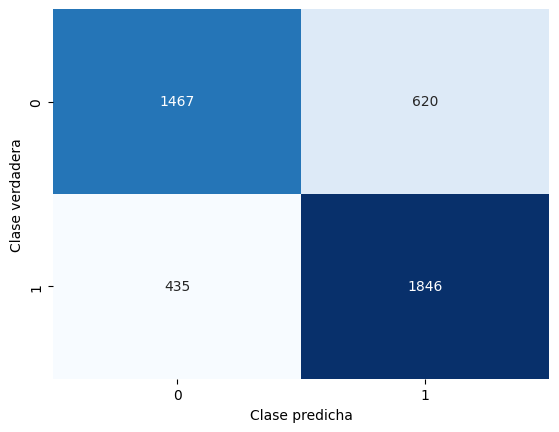

In [23]:
#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que z_test.argmax(1) son las etiquetas reales y y_pred_roberta.argmax(1) son las etiquetas predichas
cm = confusion_matrix(z_test.argmax(1), y_pred_roberta.argmax(1))

# Crear un heatmap de la matriz de confusión
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Añadir etiquetas a los ejes
plt.xlabel("Clase predicha")
plt.ylabel("Clase verdadera")

# Mostrar el gráfico
plt.show()


137/137 [==============================] - 73s 536ms/step
Resultados de RoBERTa:
[[3.0138802e-03 9.9698609e-01]
 [9.9987257e-01 1.2746533e-04]
 [9.9861372e-01 1.3862448e-03]
 ...
 [8.5044909e-01 1.4955090e-01]
 [4.1288801e-02 9.5871121e-01]
 [5.8206772e-03 9.9417937e-01]]
Predicciones de RoBERTa:
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


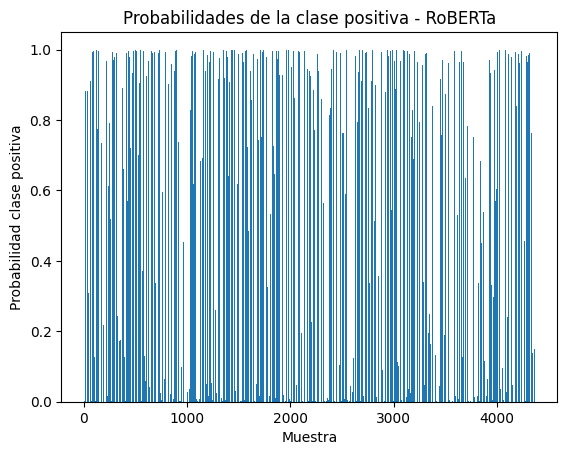

In [24]:
result_roberta = model.predict([test_input_ids, test_attention_masks])
y_pred_roberta = np.zeros_like(result_roberta)
y_pred_roberta[np.arange(len(y_pred_roberta)), result_roberta.argmax(1)] = 1

# Imprimir result_roberta
print("Resultados de RoBERTa:")
print(result_roberta)

# Imprimir y_pred_roberta
print("Predicciones de RoBERTa:")
print(y_pred_roberta)

# Obtener las probabilidades de la clase positiva (etiqueta 1)
probabilities = result_roberta[:, 1]

# Crear índices para las muestras
indices = np.arange(len(probabilities))

# Generar gráfico de barras
plt.bar(indices, probabilities)
plt.xlabel("Muestra")
plt.ylabel("Probabilidad clase positiva")
plt.title("Probabilidades de la clase positiva - RoBERTa")
plt.show()


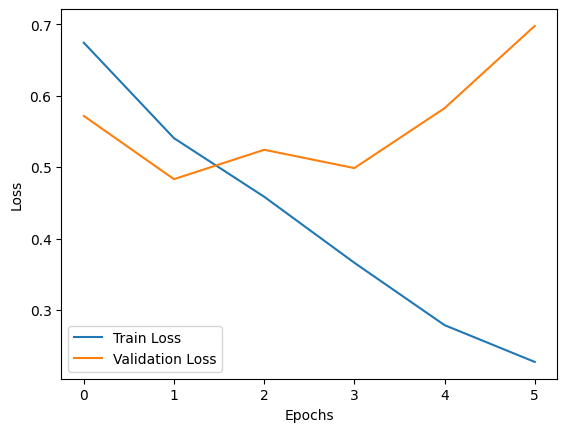

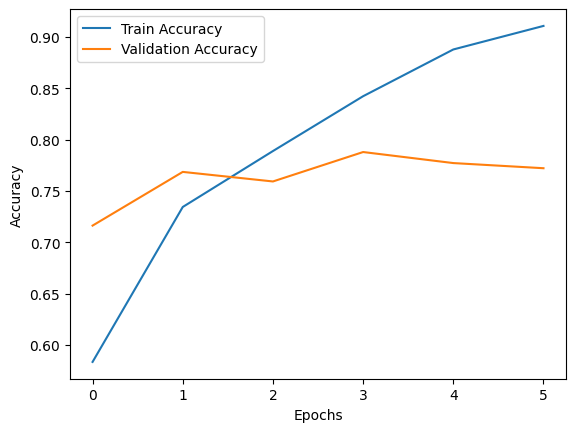

In [25]:
import matplotlib.pyplot as plt

# Obtener las métricas de entrenamiento y validación del historial
train_loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
train_accuracy = history_2.history['binary_accuracy']
val_accuracy = history_2.history['val_binary_accuracy']

# Generar gráfica de pérdida
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generar gráfica de precisión
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


DATA_AUGMENTATION

In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import wordnet

def augment_data_with_synonyms(data_frame, text_column, label_column):
    augmented_data = []
    for index, row in data_frame.iterrows():
        sentence = row[text_column]
        label = row[label_column]
        augmented_sentence = []
        tokens = nltk.word_tokenize(sentence)
        for token in tokens:
            synonyms = wordnet.synsets(token)
            if synonyms:
                synonym = synonyms[0].lemmas()[0].name()
                augmented_sentence.append(synonym)
            else:
                augmented_sentence.append(token)
        augmented_data.append({'text': ' '.join(augmented_sentence), 'task1': label})
    augmented_df = pd.DataFrame(augmented_data)
    augmented_df = pd.concat([data_frame, augmented_df], ignore_index=True)
    return augmented_df


# Convertir la columna de texto a tipo string
train_data['text'] = train_data['text'].astype(str)
# Aplicar data augmentation
augmented_df = augment_data_with_synonyms(train_data, 'text', 'task1')

# Imprimir el DataFrame original y el ampliado
print("DataFrame original:")
print(train_data)

print("\nDataFrame ampliado con sinónimos:")
print(augmented_df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


DataFrame original:
                                                   text       task1
0     race baiting point accurately medium speculati...  non-sexist
1     assassin right assassin creed spit water like ...      sexist
2                                   seguro hermoso nico  non-sexist
3     quin haber decir poder reclamar rbitro creer m...  non-sexist
4     feliz navidad leer rubio tontar mejor deseo ca...      sexist
...                                                 ...         ...
6972                  miss juncker great bint borrrring  non-sexist
6973  dont know youve notice racism isnt something p...  non-sexist
6974  literally less hour woman first erase story va...      sexist
6975  abortar desear muerte nadie obligar abortar si...  non-sexist
6976  curioso tinder falda corto sostn solayo tena a...      sexist

[6977 rows x 2 columns]

DataFrame ampliado con sinónimos:
                                                    text       task1
0      race baiting point accuratel

In [ ]:
print("Longitud del DataFrame combinado:", len(augmented_df))


Longitud del DataFrame combinado: 13954
